##### Citation: Used sklearn library and sample examples from library while developing code

In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import itertools

import time

# General Functions Data and Plots

In [2]:
def plot_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()

In [3]:
def plot_log_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.semilogx(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.semilogx(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()
    plt.clf()

In [4]:
def import_data():
    df_ds1 = pd.read_csv("winequality-red.csv", sep=";").append(pd.read_csv("winequality-white.csv", sep=";"))
    missing_values = ['?']
    df_ds2 = pd.read_csv("breast-cancer-wisconsin.csv", sep=",",na_values = missing_values)
    df_ds2.fillna(method='ffill',inplace=True)
    X_ds1 = np.array(df_ds1.values[:,1:-1])
    y_ds1 = np.array(df_ds1.values[:,-1])
    y_ds1 = (y_ds1<6).astype(int)
    X_ds2 = np.array(df_ds2.values[:,1:-1])
    y_ds2 = np.array(df_ds2.values[:,-1])
    return X_ds1, y_ds1, X_ds2, y_ds2

In [5]:
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.20)
    sc = preprocessing.StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

In [6]:
def plot_roc_curve(clf_best_params_,X_test, y_test,title, xlabel, ylabel, filename):
    
    metrics.plot_roc_curve(clf_best_params_, X_test, y_test)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.savefig(filename)
    plt.show()

In [7]:
def plot_confusion_matrix(clf_dt_best_params_,X_test, y_test, filename):
    titles_options = [("Confusion Matrix", None),
                  ("Confusion Matrix - Sensitivity and Specificity", 'true')]
    
    for title, normalize in titles_options:
        disp = metrics.plot_confusion_matrix(clf_dt_best_params_, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        __filename = "".join(filename.split('.')[:-1])+ '_' + title.replace(" ", "_") + '.' + filename.split('.')[-1]
        disp.ax_.set_title(title)
        plt.savefig(__filename)
    plt.show()

## Decision Tree Functions

In [8]:
def decision_learner(X_train, X_test, y_train, y_test):
    __clf_dt = tree.DecisionTreeClassifier(random_state=18)
    print(__clf_dt)
    __clf_dt.fit(X_train, y_train)
    y_pred = __clf_dt.predict(X_test)
    
    dt_accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Decision Tree - Accuracy of decision tree: ',dt_accuracy*100)
    return __clf_dt

In [9]:
def plot_dt_validation_curve(clf_dt, X_train, y_train,filename):
    depth_range = np.arange(1,31,1)
    train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)
    plot_learner(depth_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation Curve for Decision Tree', 'Max Depth',  'Score', filename)


In [10]:
def set_dt_hyperparameters(clf_dt_, X_train_dt_, y_train_dt_,X_test_dt_, y_test_dt_):
    param_grid = [{ 'max_depth':np.arange(7,25,0.5)}]
    clf_dt = GridSearchCV(clf_dt_, param_grid=param_grid, cv=5)
    clf_dt.fit(X_train_dt_, y_train_dt_)
    clf_dt_ = clf_dt
    print("Decision Traa - Best Parameters: ", clf_dt.best_params_)
    y_pred_dt_ = clf_dt.predict(X_test_dt_)
    print('Decision Tree - Accuracy: ' , (metrics.accuracy_score(y_test_dt_, y_pred_dt_) * 100))
    return clf_dt_.best_params_

In [150]:
def plot_dt_learning_curve(clf_dt_best_params_, X_train, y_train,filename):
    __max_depth = clf_dt_best_params_['max_depth']
    #min_samples_leaf = clf_dt_best_params_['min_samples_leaf']
    __clf_lc_dt = tree.DecisionTreeClassifier(random_state=18,max_depth = 4)
    print(__clf_lc_dt)
    train_sizes = np.linspace(0.3, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_dt, X_train, y_train,train_sizes=train_sizes, cv=5,random_state=18)
    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning Curve for Decision Tree', 'Training Eamples',  'Score', filename)


## Neural Network Functions

In [12]:
def nn_learner(X_train, X_test, y_train, y_test):
    #clf_nn = MLPClassifier(hidden_layer_sizes=(10, 10,10), random_state=18, max_iter=1000)
    __clf_nn = MLPClassifier(hidden_layer_sizes=(20, 20,10),random_state=18)
    print(__clf_nn)
    __clf_nn.fit(X_train, y_train)
    y_pred = __clf_nn.predict(X_test)
    nn_accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))
    return __clf_nn

In [13]:
def plot_nn_validation_curve(clf_nn,X_train, y_train,filename_alpha,filename_lr):
    # Alpha
    alpha_range =  np.logspace(-3, 2, 6)
    train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="alpha", param_range=alpha_range, cv=5)
    plot_log_learner(alpha_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation Curve for  Neural Network', 'Alpha',  'Score', filename_alpha)
    # Learning rate
    lr_range = np.logspace(-5, 0, 6)
    train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="learning_rate_init", param_range=lr_range,cv=5)
    plot_log_learner(lr_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation Curve for  Neural Network', 'Learning Rate',  'Score', filename_lr)

In [14]:
def set_nn_hyperparameters(clf_nn_, X_train_nn_, y_train_nn_,X_test_nn_,y_test_nn_):
    _params = [{'hidden_layer_sizes' : [(10, 10,10),(10, 5,10),(10, 5,5)], 'alpha' : np.logspace(-2, 2, 5), 'learning_rate_init' : np.logspace(-3, 1, 5)}]
    clf_nn = GridSearchCV(clf_nn_, param_grid=_params, cv=5)
    clf_nn.fit(X_train_nn_, y_train_nn_)
    clf_nn_ = clf_nn
    best_params = clf_nn.best_params_
    print('Best Parameters: ',clf_nn.best_params_)
    y_pred_nn_ = clf_nn.predict(X_test_nn_)
    print('Accuracy of decision tree is %.2f%%' % (metrics.accuracy_score(y_test_nn_, y_pred_nn_) * 100))
    return clf_nn.best_params_

In [292]:
def plot_nn_learning_curve(clf_nn_best_params_, X_train, y_train,filename):
    __alpha = 0.1 #clf_nn_best_params_['alpha']
    __hidden_layer_sizes = (20,20,20) #clf_nn_best_params_['hidden_layer_sizes']
    __learning_rate_init = 0.1 #clf_nn_best_params_['learning_rate_init']
#     __alpha = clf_nn_best_params_['alpha']
#     __hidden_layer_sizes = clf_nn_best_params_['hidden_layer_sizes']
#     __learning_rate_init = clf_nn_best_params_['learning_rate_init']
    __clf_lc_nn = MLPClassifier(random_state=18,alpha=__alpha,hidden_layer_sizes=__hidden_layer_sizes,learning_rate_init=__learning_rate_init)
    print(__clf_lc_nn)
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_nn, X_train, y_train, train_sizes=train_sizes, cv=5,random_state=18)
    
    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning Curve for  Neural Network', 'Training Examples',  'Score', filename)

## Boosting Functions

In [16]:
def boost_learner(X_train, X_test, y_train, y_test):
    dt_ = tree.DecisionTreeClassifier(max_depth=7,random_state=18)
    __clf_boosted = AdaBoostClassifier(base_estimator=dt_, n_estimators= 200, random_state=18)
    print(__clf_boosted)
    t0 = time.time()
    __clf_boosted.fit(X_train,y_train)
    t1 = time.time() - t0
    print("Boosting - Training Time: ", t1)
    y_pred = __clf_boosted.predict(X_test)
    print('Boosting - Accuracy: ' , (metrics.accuracy_score(y_test, y_pred) * 100))
    #print('Boosting - Accuracy: ', clf_boosted.score(X_test, y_test) * 100)
    return __clf_boosted

In [17]:
def plot_boost_validation_curve(clf_boosted,X_train, y_train,filename):
    n_estimators_range = np.linspace(1,400,10).astype('int')
    train_scores, test_scores = validation_curve(clf_boosted, X_train, y_train, param_name="n_estimators", param_range=n_estimators_range, cv=5)
    plot_learner(n_estimators_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation Curve for Boosting', 'Numner of Estimators',  'Score', filename)

In [18]:
def set_boost_hyperparameters(clf_boosted_bs1_, X_train_bs1_, y_train_bs1_,X_test_bs1_,y_test_bs1_):
    _params = [{'n_estimators' : np.linspace(1,40,10).astype('int')}]
    clf_boosted = GridSearchCV(clf_boosted_bs1_, param_grid=_params, cv=10)
    clf_boosted.fit(X_train_bs1_, y_train_bs1_)
    clf_boosted_ = clf_boosted
    
    print('Boosting - Best Paremeters: ', clf_boosted_.best_params_)
    y_pred_bs1_ = clf_boosted_.predict(X_test_bs1_)
    print('Boosting - Accuracy: ',metrics.accuracy_score(y_test_bs1_, y_pred_bs1_) * 100)
    return clf_boosted_.best_params_

In [19]:
def plot_boost_learning_curve(clf_boosted_param,  X_train, y_train,filename):
    __n_estimators = clf_boosted_param['n_estimators']
    dt_best = tree.DecisionTreeClassifier(max_depth=4,random_state=18)
    __clf__lc_boosted = AdaBoostClassifier(base_estimator=dt_best, n_estimators=18, random_state=18)
    print(__clf__lc_boosted)
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(__clf__lc_boosted, X_train, y_train, train_sizes=train_sizes, cv=5, random_state=18)
    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning Curve for Boosting', 'Training Examples',  'Score', filename)

## SVM Functions

In [20]:
def svm_learner(X_train, X_test, y_train, y_test):
    __clf_svm = svm.SVC(random_state=18,kernel='rbf')
    print(__clf_svm)
    t0 = time.time()
    __clf_svm.fit(X_train, y_train)
    t1 = time.time() - t0
    print('Training time: ',t1)
    y_pred = __clf_svm.predict(X_test)
    _accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy : ', _accuracy*100)
    return  __clf_svm

In [21]:
def plot_svm_validation_curve(svm_linear,X_train, y_train,filename):
    C_range = [0.01,0.1,1,10]
    train_scores, test_scores = validation_curve(svm_linear, X_train, y_train, param_name="C", param_range=C_range, cv=5)
    plot_log_learner(C_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation curve for SVM', 'C Values',  'Score', filename)

In [22]:
def set_svm_hyperparameters(svm_linear, X_train_svm_, y_train_svm_,X_test_svm_,y_test_svm_):
    C_range = [0.01,0.1,1,10]
    _params = [{'C' : C_range}]
    svm_linear = GridSearchCV(svm_linear, param_grid=_params, cv=5)
    svm_linear.fit(X_train_svm_, y_train_svm_)
    clf_svm_ = svm_linear
    print('Best Paremeters: ', svm_linear.best_params_)
    y_pred_svm_ = clf_svm_.predict(X_test_svm_)
    print('Accuracy: ' , (metrics.accuracy_score(y_test_svm_, y_pred_svm_) * 100))
    return clf_svm_.best_params_

In [255]:
def plot_svm_learning_curve(clf_svm_best_params_, X_train, y_train,filename):
    __C = clf_svm_best_params_['C']
    __clf_lc_svm = svm.SVC(random_state=18,C=4.2,kernel='rbf')
    print(__clf_lc_svm)
    __clf_lc_svm.fit(X_train, y_train)
    train_sizes = np.linspace(.3, 1.0, 6)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_svm, X_train, y_train, train_sizes=train_sizes, cv=5,random_state=18)

    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning curve for SVM', 'Training Examples',  'Score', filename)

## KNN Functions

In [24]:
def knn_learner(X_train_knn1_, X_test_knn1_, y_train_knn1_, y_test_knn1_):
    __clf_knn = KNeighborsClassifier()
    print(__clf_knn)
    return __clf_knn

In [25]:
def plot_knn_validation_curve(knn_learner,X_train_knn_, y_train_knn_, filename):
    k_range = np.arange(1, 50)
    train_scores, test_scores = validation_curve(knn_learner, X_train_knn_, y_train_knn_, param_name="n_neighbors", param_range=k_range, cv=10)
    
    plot_learner(k_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation curve for kNN', 'k Values',  'Score', filename)

In [500]:
def set_knn_hyperparameters(knn, X_train_knn_, y_train_knn_, X_test_knn_, y_test_knn_):
    k_range = np.arange(5, 20)
    _parmas = {"n_neighbors" : k_range}
    clf_knn_ = GridSearchCV(knn, param_grid=_parmas, cv=5)
    clf_knn_.fit(X_train_knn_, y_train_knn_)
    print('Best Parameters: ', clf_knn_.best_params_)
    y_pred_knn_ = clf_knn_.predict(X_test_knn_)
    print('Accuracy :', metrics.accuracy_score(y_test_knn_, y_pred_knn_) * 100)
    return clf_knn_.best_params_,clf_knn_.fit(X_train_knn_, y_train_knn_)

In [924]:
def plot_knn_learning_curve(clf_knn_best_params_, X_train, y_train,filename):
    __n_neighbors = clf_knn_best_params_['n_neighbors']
    __clf_lc_knn = KNeighborsClassifier(n_neighbors = 32)
    print(__clf_lc_knn)
    __clf_lc_knn.fit(X_train, y_train)
    train_sizes = np.linspace(0.3, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_knn, X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning curve for kNN', 'Training Examples',  'Score', filename)

## Compare Function

In [28]:
def plot_compare_roc_curve(list_roc_, filename):
    disp = []
    for i,roc_ in enumerate(list_roc_) : 
        if i == 0:
            disp.append(metrics.plot_roc_curve(roc_[0], roc_[1], roc_[2],name= roc_[3]))
        else: 
            disp.append(metrics.plot_roc_curve(roc_[0], roc_[1], roc_[2],name= roc_[3],ax=disp[i-1].ax_))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.savefig(filename)
    plt.show()

# Load Datasets

In [29]:
X_ds1, y_ds1, X_ds2, y_ds2 = import_data()

In [750]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test(X_ds1, y_ds1)

In [751]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test(X_ds2, y_ds2)

### Wine Quality Train/Test data

In [687]:
X_train_dt1, X_test_dt1, y_train_dt1, y_test_dt1 = X_train_1, X_test_1, y_train_1, y_test_1
X_train_nn1, X_test_nn1, y_train_nn1, y_test_nn1 = X_train_1, X_test_1, y_train_1, y_test_1
X_train_bs1, X_test_bs1, y_train_bs1, y_test_bs1 = X_train_1, X_test_1, y_train_1, y_test_1
X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1 = X_train_1, X_test_1, y_train_1, y_test_1
X_train_knn1, X_test_knn1, y_train_knn1, y_test_knn1 = X_train_1, X_test_1, y_train_1, y_test_1

### Breast Cancer Train/Test Data

In [688]:
X_train_dt2, X_test_dt2, y_train_dt2, y_test_dt2 = X_train_2, X_test_2, y_train_2, y_test_2
X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2 = X_train_2, X_test_2, y_train_2, y_test_2
X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2 = X_train_2, X_test_2, y_train_2, y_test_2
X_train_svm2, X_test_svm2, y_train_svm2, y_test_svm2 = X_train_2, X_test_2, y_train_2, y_test_2
X_train_knn2, X_test_knn2, y_train_knn2, y_test_knn2 = X_train_2, X_test_2, y_train_2, y_test_2

# Problem 1 - Decision Tree

## Decision Tree Execution for Wine Quality Dataset

In [151]:
clf_dt1 = decision_learner(X_train_dt1, X_test_dt1, y_train_dt1, y_test_dt1)

DecisionTreeClassifier(random_state=18)
Decision Tree - Accuracy of decision tree:  77.07692307692308


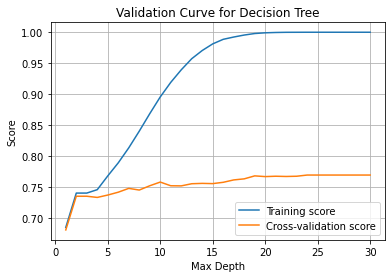

In [152]:
plot_dt_validation_curve(clf_dt1, X_train_dt1, y_train_dt1,'decision_tree_validation_curve_1-100.png')

In [153]:
estimator_param_dt1 = set_dt_hyperparameters(clf_dt1, X_train_dt1, y_train_dt1,X_test_dt1,y_test_dt1)

Decision Traa - Best Parameters:  {'max_depth': 24.0}
Decision Tree - Accuracy:  77.07692307692308


DecisionTreeClassifier(max_depth=4, random_state=18)


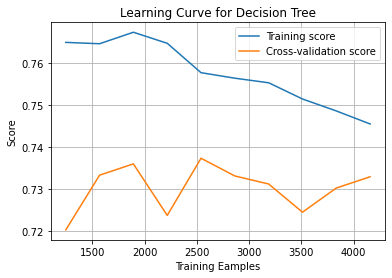

In [154]:
plot_dt_learning_curve(estimator_param_dt1, X_train_dt1, y_train_dt1,'decision_tree_learning_curve_1-100.png')

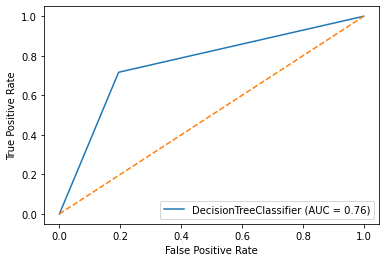

In [155]:
plot_roc_curve(clf_dt1,X_test_dt1, y_test_dt1, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'decision_tree_roc_curve_1-100.png')

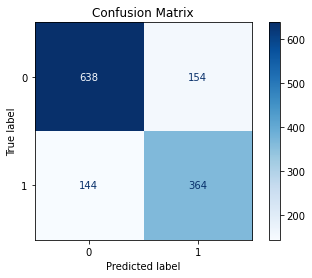

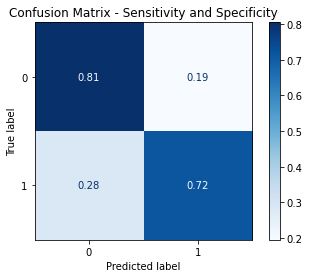

In [156]:
plot_confusion_matrix(clf_dt1,X_test_dt1, y_test_dt1,'decision_tree_confusion_matrix_1-100.png')

In [157]:
classification_report_dt1 = metrics.classification_report(y_test_dt1, clf_dt1.predict(X_test_dt1),output_dict=True)
print(metrics.classification_report(y_test_dt1, clf_dt1.predict(X_test_dt1)))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       792
           1       0.70      0.72      0.71       508

    accuracy                           0.77      1300
   macro avg       0.76      0.76      0.76      1300
weighted avg       0.77      0.77      0.77      1300



## Decision Tree Execution for Breast Cancer Dataset

In [158]:
clf_dt2 = decision_learner(X_train_dt2, X_test_dt2, y_train_dt2, y_test_dt2)

DecisionTreeClassifier(random_state=18)
Decision Tree - Accuracy of decision tree:  91.42857142857143


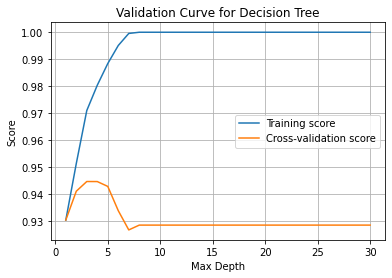

In [159]:
plot_dt_validation_curve(clf_dt2, X_train_dt2, y_train_dt2,'decision_tree_validation_curve_1-100.png')

In [160]:
estimator_param_dt2 = set_dt_hyperparameters(clf_dt2, X_train_dt2, y_train_dt2,X_test_dt2,y_test_dt2)

Decision Traa - Best Parameters:  {'max_depth': 8.0}
Decision Tree - Accuracy:  91.42857142857143


DecisionTreeClassifier(max_depth=4, random_state=18)


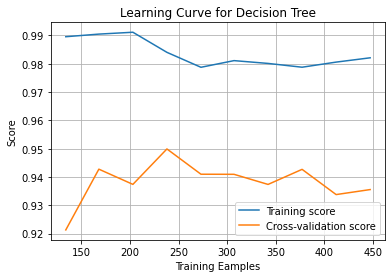

In [161]:
plot_dt_learning_curve(estimator_param_dt2, X_train_dt2, y_train_dt2,'decision_tree_learning_curve_2-100.png')

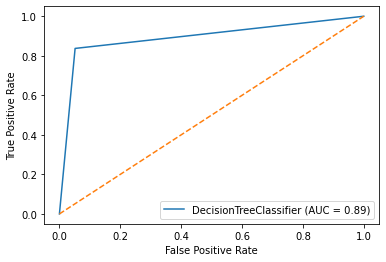

In [162]:
plot_roc_curve(clf_dt2,X_test_dt2, y_test_dt2, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'decision_tree_roc_curve_2-100.png')

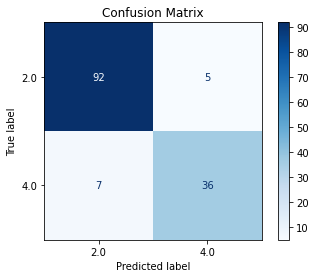

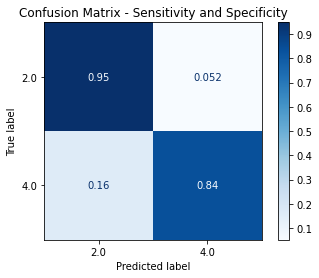

In [163]:
plot_confusion_matrix(clf_dt2,X_test_dt2, y_test_dt2, 'decision_tree_confusion_matrix_2-100.png')

In [164]:
classification_report_dt2 = metrics.classification_report(y_test_dt2, clf_dt2.predict(X_test_dt2),output_dict=True)
print(metrics.classification_report(y_test_dt2, clf_dt2.predict(X_test_dt2)))

              precision    recall  f1-score   support

         2.0       0.93      0.95      0.94        97
         4.0       0.88      0.84      0.86        43

    accuracy                           0.91       140
   macro avg       0.90      0.89      0.90       140
weighted avg       0.91      0.91      0.91       140



# Problem 2 - Neural Network

## Neural Network for Wine Quality Dataset

In [293]:
clf_nn1 = nn_learner(X_train_nn1, X_test_nn1, y_train_nn1, y_test_nn1)

MLPClassifier(hidden_layer_sizes=(20, 20, 10), random_state=18)
Accuracy of neural network without hyperparameter tuning is 77.69%


C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\sit

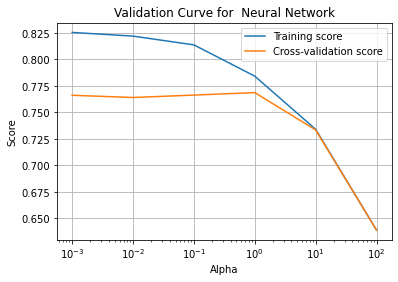

C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\sit

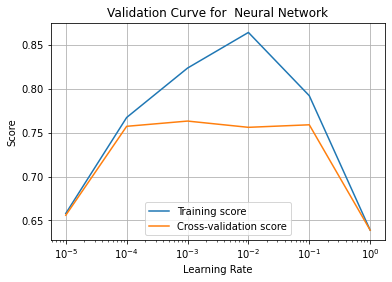

<Figure size 432x288 with 0 Axes>

In [294]:
plot_nn_validation_curve(clf_nn1, X_train_nn1, y_train_nn1,'nn_validation_curve_alpha_1-100.png','nn_validation_curve_lr_1-100.png')

In [295]:
params_best_nn1 = set_nn_hyperparameters(clf_nn1, X_train_nn1, y_train_nn1,X_test_nn1,y_test_nn1)

C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\sit

Best Parameters:  {'alpha': 1.0, 'hidden_layer_sizes': (10, 5, 5), 'learning_rate_init': 0.01}
Accuracy of decision tree is 76.00%


MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 20, 20),
              learning_rate_init=0.1, random_state=18)


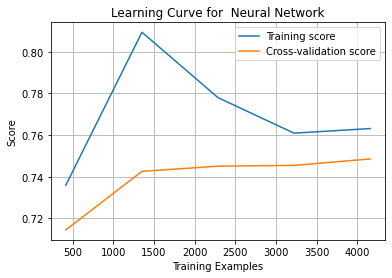

In [296]:
plot_nn_learning_curve(params_best_nn1, X_train_nn1, y_train_nn1,'nn_learning_curve_1-100.png')

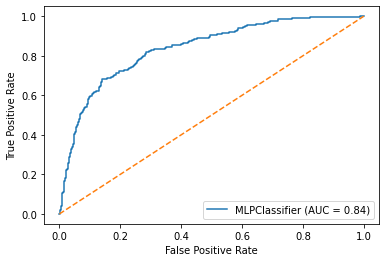

In [297]:
plot_roc_curve(clf_nn1,X_test_nn1, y_test_nn1, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'nn_tree_roc_curve_1-100.png')

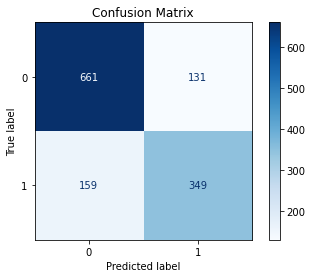

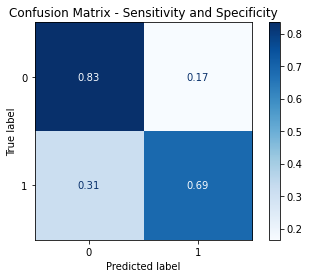

In [298]:
plot_confusion_matrix(clf_nn1,X_test_nn1, y_test_nn1, 'nn_confusion_matrix_1-100.png')

In [299]:
classification_report_nn1 = metrics.classification_report(y_test_nn1, clf_nn1.predict(X_test_nn1),output_dict=True)
print(metrics.classification_report(y_test_nn1, clf_nn1.predict(X_test_nn1)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       792
           1       0.73      0.69      0.71       508

    accuracy                           0.78      1300
   macro avg       0.77      0.76      0.76      1300
weighted avg       0.78      0.78      0.78      1300



## Neural Network for Brest Cancer Dataset

In [300]:
clf_nn2 = nn_learner(X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2)

MLPClassifier(hidden_layer_sizes=(20, 20, 10), random_state=18)
Accuracy of neural network without hyperparameter tuning is 96.43%


C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\sit

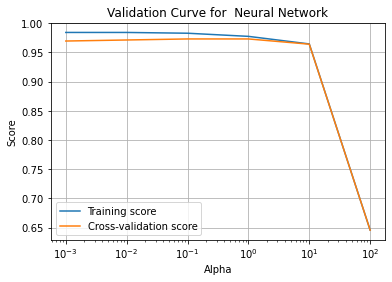

C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\sit

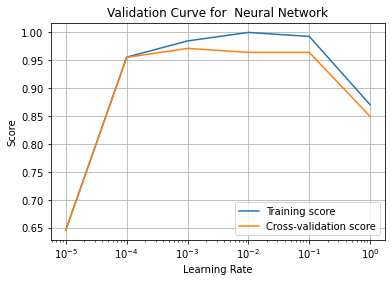

<Figure size 432x288 with 0 Axes>

In [301]:
plot_nn_validation_curve(clf_nn2, X_train_nn2, y_train_nn2,'nn_validation_curve_alpha_2-100.png','nn_validation_curve_lr_2-100.png')

In [302]:
params_best_nn2 = set_nn_hyperparameters(clf_nn2, X_train_nn2, y_train_nn2,X_test_nn2,y_test_nn2)

C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Dev\Anaconda3\envs\VitrualEnv\lib\sit

Best Parameters:  {'alpha': 1.0, 'hidden_layer_sizes': (10, 5, 10), 'learning_rate_init': 0.1}
Accuracy of decision tree is 95.00%


MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 20, 20),
              learning_rate_init=0.1, random_state=18)


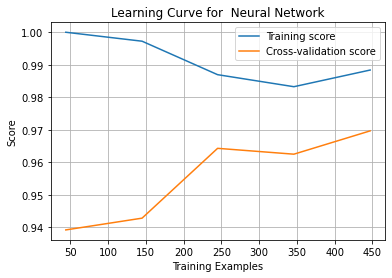

In [303]:
plot_nn_learning_curve(params_best_nn2, X_train_nn2, y_train_nn2,'nn_learning_curve_2-100.png')

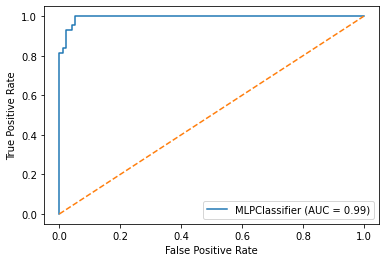

In [304]:
plot_roc_curve(clf_nn2,X_test_nn2, y_test_nn2, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'nn_tree_roc_curve_2-100.png')

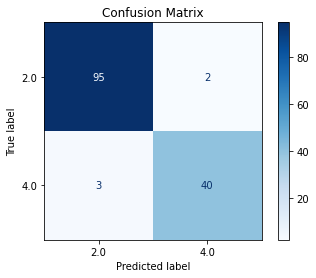

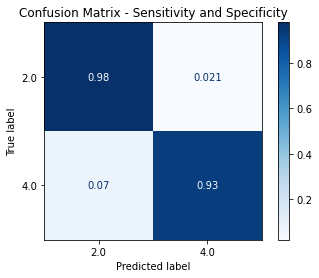

In [305]:
plot_confusion_matrix(clf_nn2,X_test_nn2, y_test_nn2, 'nn_confusion_matrix_2-100.png')

In [306]:
classification_report_nn2 = metrics.classification_report(y_test_nn2, clf_nn2.predict(X_test_nn2),output_dict=True)
print(metrics.classification_report(y_test_nn2, clf_nn2.predict(X_test_nn2)))

              precision    recall  f1-score   support

         2.0       0.97      0.98      0.97        97
         4.0       0.95      0.93      0.94        43

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



# Problem 3 - Boosting

## Boosting for Wine Quality Dataset

In [169]:
clf_bs1 = boost_learner(X_train_bs1, X_test_bs1, y_train_bs1, y_test_bs1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         random_state=18),
                   n_estimators=200, random_state=18)
Boosting - Training Time:  4.10701060295105
Boosting - Accuracy:  81.23076923076923


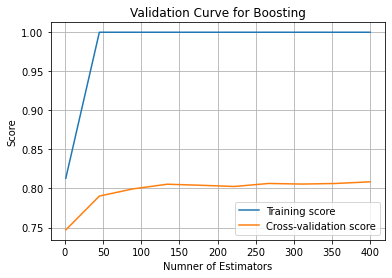

In [170]:
plot_boost_validation_curve(clf_bs1,X_train_bs1, y_train_bs1,'boosting_validation_curve_1-100.png')

In [171]:
clf_boosted_best_param_bs1 = set_boost_hyperparameters(clf_bs1, X_train_bs1, y_train_bs1,X_test_bs1,y_test_bs1)

Boosting - Best Paremeters:  {'n_estimators': 35}
Boosting - Accuracy:  80.92307692307692


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=18),
                   n_estimators=18, random_state=18)


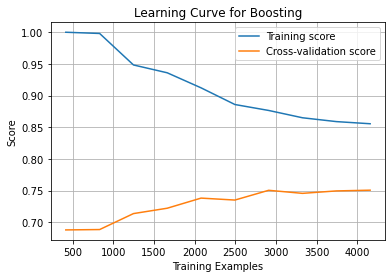

In [172]:
plot_boost_learning_curve(clf_boosted_best_param_bs1,  X_train_bs1, y_train_bs1,'boosting_learning_curve_1-100.png')

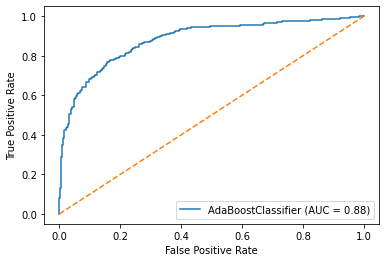

In [173]:
plot_roc_curve(clf_bs1,X_test_bs1, y_test_bs1, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'boosting_tree_roc_curve_1-100.png')

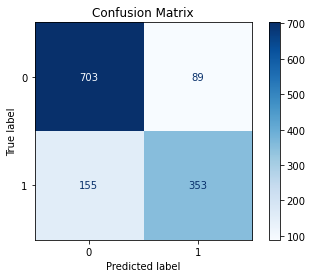

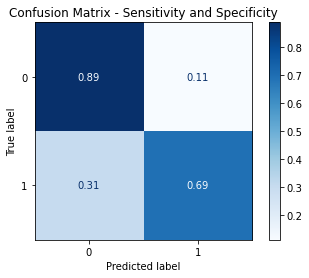

In [174]:
plot_confusion_matrix(clf_bs1,X_test_bs1, y_test_bs1, 'boosting_confusion_matrix_1-100.png')

In [175]:
classification_report_bs1 = metrics.classification_report(y_test_bs1, clf_bs1.predict(X_test_bs1),output_dict=True)
print(metrics.classification_report(y_test_bs1, clf_bs1.predict(X_test_bs1)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       792
           1       0.80      0.69      0.74       508

    accuracy                           0.81      1300
   macro avg       0.81      0.79      0.80      1300
weighted avg       0.81      0.81      0.81      1300



## Boosting for Breast Cancer Dataset

In [176]:
clf_bs2 = boost_learner(X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         random_state=18),
                   n_estimators=200, random_state=18)
Boosting - Training Time:  0.003991365432739258
Boosting - Accuracy:  93.57142857142857


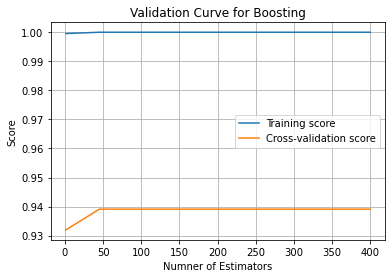

In [177]:
plot_boost_validation_curve(clf_bs2,X_train_bs2, y_train_bs2,'boosting_validation_curve_2-100.png')

In [178]:
clf_boosted_best_param_bs2 = set_boost_hyperparameters(clf_bs2, X_train_bs2, y_train_bs2,X_test_bs2,y_test_bs2)

Boosting - Best Paremeters:  {'n_estimators': 14}
Boosting - Accuracy:  93.57142857142857


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=18),
                   n_estimators=18, random_state=18)


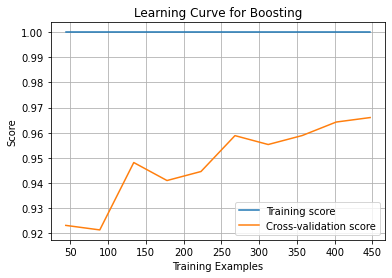

In [179]:
plot_boost_learning_curve(clf_boosted_best_param_bs2,  X_train_bs2, y_train_bs2,'boosting_learning_curve_2-100.png')

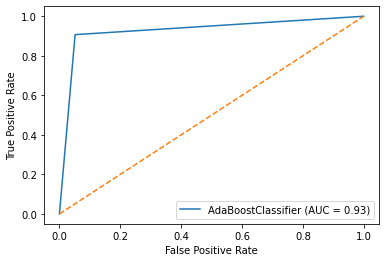

In [180]:
plot_roc_curve(clf_bs2,X_test_bs2, y_test_bs2, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'boosting_roc_curve_2-100.png')

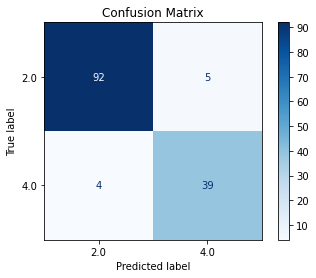

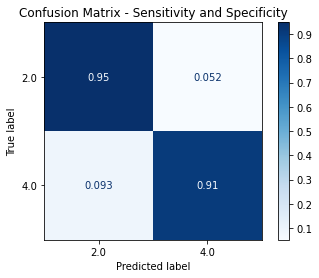

In [181]:
plot_confusion_matrix(clf_bs2,X_test_bs2, y_test_bs2, 'boosting_confusion_matrix_2-100.png')

In [182]:
classification_report_bs2 = metrics.classification_report(y_test_bs2, clf_bs2.predict(X_test_bs2),output_dict=True)
print(metrics.classification_report(y_test_bs2, clf_bs2.predict(X_test_bs2)))

              precision    recall  f1-score   support

         2.0       0.96      0.95      0.95        97
         4.0       0.89      0.91      0.90        43

    accuracy                           0.94       140
   macro avg       0.92      0.93      0.92       140
weighted avg       0.94      0.94      0.94       140



# Problem 4 - Support Vector Machine (SVM)

## SVM for Wine Quality Dataset

In [256]:
clf_svm1 = svm_learner(X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1)

SVC(random_state=18)
Training time:  0.6362929344177246
Accuracy :  77.84615384615384


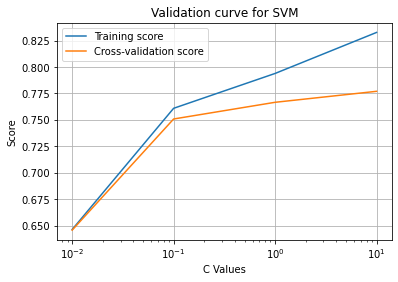

<Figure size 432x288 with 0 Axes>

In [257]:
plot_svm_validation_curve(clf_svm1,X_train_svm1, y_train_svm1,'svm_validation_curve_1-100.png')

In [258]:
clf_svm_best_param_1 = set_svm_hyperparameters(clf_svm1, X_train_svm1, y_train_svm1,X_test_svm1,y_test_svm1)

Best Paremeters:  {'C': 10}
Accuracy:  78.6923076923077


SVC(C=4.2, random_state=18)


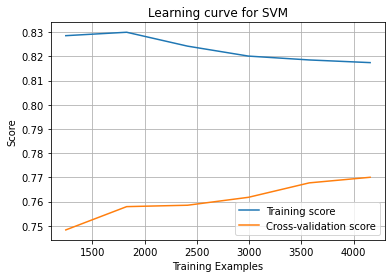

In [259]:
plot_svm_learning_curve(clf_svm_best_param_1, X_train_svm1, y_train_svm1,'svm_learning_curve_1-100.png')

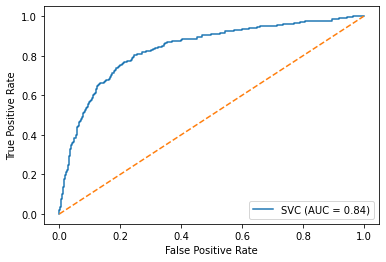

In [260]:
plot_roc_curve(clf_svm1,X_test_svm1, y_test_svm1, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'svm_roc_curve_1-100.png')

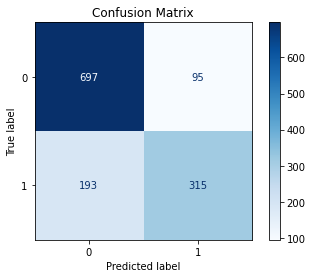

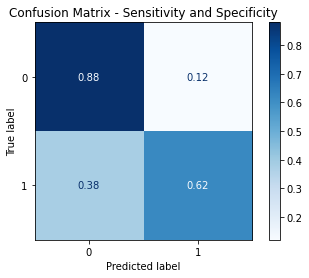

In [261]:
plot_confusion_matrix(clf_svm1,X_test_svm1, y_test_svm1, 'svm_confusion_matrix_1-100.png')

In [262]:
classification_report_svm1 = metrics.classification_report(y_test_svm1, clf_svm1.predict(X_test_svm1),output_dict=True)
print(metrics.classification_report(y_test_svm1, clf_svm1.predict(X_test_svm1)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       792
           1       0.77      0.62      0.69       508

    accuracy                           0.78      1300
   macro avg       0.78      0.75      0.76      1300
weighted avg       0.78      0.78      0.77      1300



## SVM for Breast Cancer Dataset

In [263]:
clf_svm2 = svm_learner(X_train_svm2, X_test_svm2, y_train_svm2, y_test_svm2)

SVC(random_state=18)
Training time:  0.004986286163330078
Accuracy :  96.42857142857143


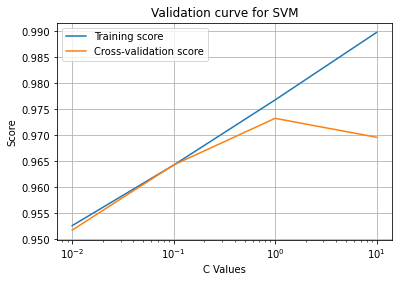

<Figure size 432x288 with 0 Axes>

In [264]:
plot_svm_validation_curve(clf_svm2,X_train_svm2, y_train_svm2,'svm_validation_curve_1-100.png')

In [265]:
clf_svm_best_param_2 = set_svm_hyperparameters(clf_svm2, X_train_svm2, y_train_svm2,X_test_svm2,y_test_svm2)

Best Paremeters:  {'C': 1}
Accuracy:  96.42857142857143


SVC(C=4.2, random_state=18)


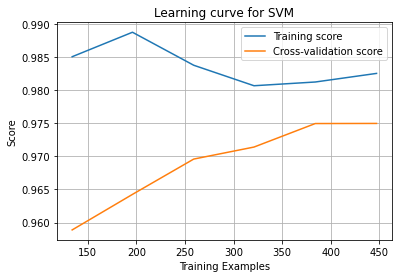

In [266]:
plot_svm_learning_curve(clf_svm_best_param_2, X_train_svm2, y_train_svm2,'svm_learning_curve_2-100.png')

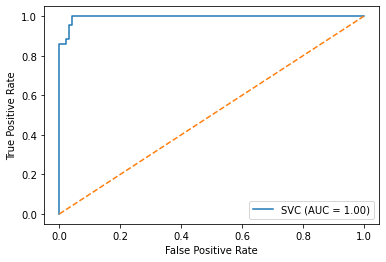

In [267]:
plot_roc_curve(clf_svm2,X_test_svm2, y_test_svm2, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'svm_roc_curve_2-100.png')

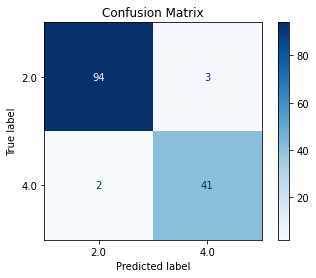

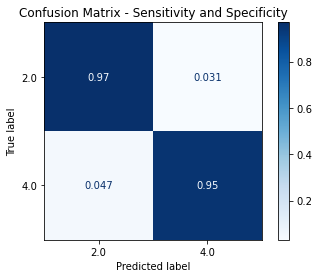

In [268]:
plot_confusion_matrix(clf_svm2,X_test_svm2, y_test_svm2, 'svm_confusion_matrix_2-100.png')

In [269]:
classification_report_svm2 = metrics.classification_report(y_test_svm2, clf_svm2.predict(X_test_svm2),output_dict=True)
print(metrics.classification_report(y_test_svm2, clf_svm2.predict(X_test_svm2)))

              precision    recall  f1-score   support

         2.0       0.98      0.97      0.97        97
         4.0       0.93      0.95      0.94        43

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



# Problem 5 - K Nearest Neighbor (KNN) 

## KNN for Wine Quality Dataset

In [925]:
clf_knn1 = knn_learner(X_train_knn1, X_test_knn1, y_train_knn1, y_test_knn1)

KNeighborsClassifier()


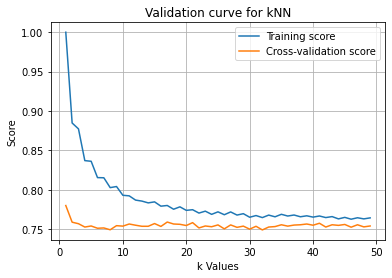

In [926]:
plot_knn_validation_curve(clf_knn1,X_train_knn1, y_train_knn1,'knn_validation_curve_1-100.png')

In [927]:
clf_knn_best_param_1,clf_fit_knn1 = set_knn_hyperparameters(clf_knn1,X_train_knn1, y_train_knn1,X_test_knn1, y_test_knn1)

Best Parameters:  {'n_neighbors': 17}
Accuracy : 74.0


KNeighborsClassifier(n_neighbors=32)


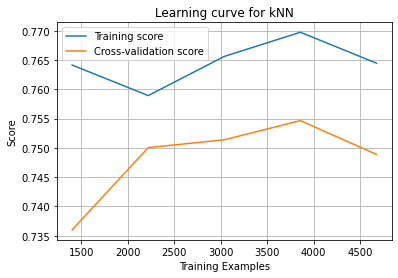

In [928]:
plot_knn_learning_curve(clf_knn_best_param_1, X_train_knn1, y_train_knn1,'knn_learning_curve_1-100.png')

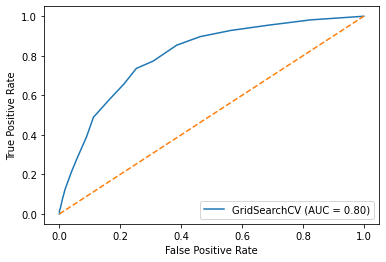

In [929]:
plot_roc_curve(clf_fit_knn1,X_test_knn1, y_test_knn1, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'knn_roc_curve_1-100.png')

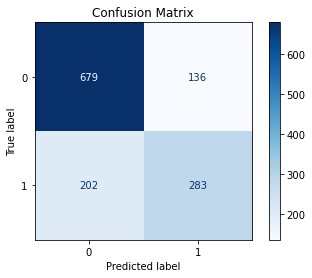

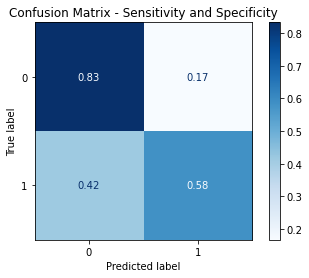

In [930]:
plot_confusion_matrix(clf_fit_knn1,X_test_knn1, y_test_knn1, 'knn_confusion_matrix_1-100.png')

In [931]:
classification_report_knn1 = metrics.classification_report(y_test_knn1, clf_fit_knn1.predict(X_test_knn1),output_dict=True)
print(metrics.classification_report(y_test_knn1, clf_fit_knn1.predict(X_test_knn1)))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       815
           1       0.68      0.58      0.63       485

    accuracy                           0.74      1300
   macro avg       0.72      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



## KNN for Breast Cancer Dataset

In [932]:
clf_knn2 = knn_learner(X_train_knn2, X_test_knn2, y_train_knn2, y_test_knn2)

KNeighborsClassifier()


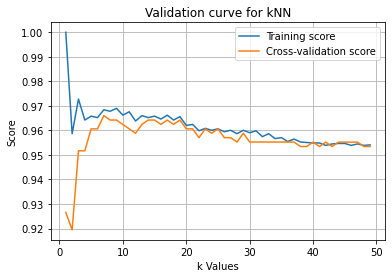

In [933]:
plot_knn_validation_curve(clf_knn2,X_train_knn2, y_train_knn2,'knn_validation_curve_2-100.png')

In [934]:
clf_knn_best_param_2, clf_fit_knn2 = set_knn_hyperparameters(clf_knn2,X_train_knn2, y_train_knn2,X_test_knn2, y_test_knn2)

Best Parameters:  {'n_neighbors': 5}
Accuracy : 97.85714285714285


KNeighborsClassifier(n_neighbors=32)


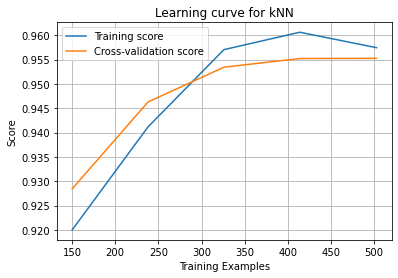

In [935]:
plot_knn_learning_curve(clf_knn_best_param_2, X_train_knn2, y_train_knn2,'knn_learning_curve_2-100.png')

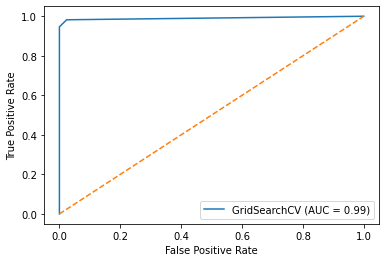

In [936]:
plot_roc_curve(clf_fit_knn2,X_test_knn2, y_test_knn2, 'ROC Curve', 'True Positive Rate', 'False Positive Rate', 'knn_roc_curve_2-100.png')

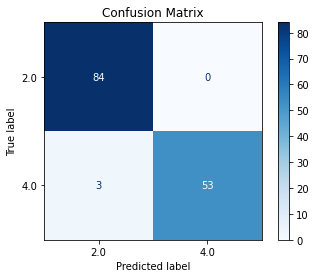

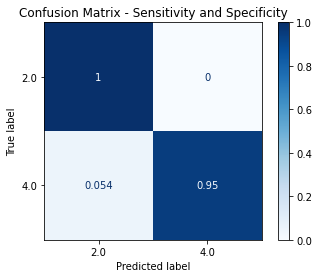

In [937]:
plot_confusion_matrix(clf_fit_knn2,X_test_knn2, y_test_knn2, 'knn_confusion_matrix_2-100.png')

In [938]:
classification_report_knn1 = metrics.classification_report(y_test_knn2, clf_fit_knn2.predict(X_test_knn2),output_dict=True)
print(metrics.classification_report(y_test_knn2, clf_fit_knn2.predict(X_test_knn2)))

              precision    recall  f1-score   support

         2.0       0.97      1.00      0.98        84
         4.0       1.00      0.95      0.97        56

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



# Compare ROC/AUC Curve

In [939]:
list_roc_1 = [(clf_dt1,X_test_dt1,y_test_dt1,'Decision Tree'),(clf_nn1,X_test_nn1,y_test_nn1,'Neural Network'),
            (clf_bs1,X_test_bs1,y_test_bs1,'Boosting'),(clf_svm1,X_test_svm1,y_test_svm1,'SVC'),(clf_fit_knn1,X_test_knn1,y_test_knn1,'KNN')]

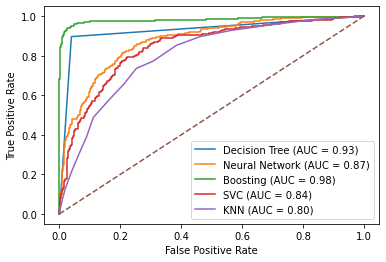

In [940]:
plot_compare_roc_curve(list_roc_1, 'roc_compare_1.png')

In [941]:
list_roc_2 = [(clf_dt2,X_test_dt2,y_test_dt2,'Decision Tree'),(clf_nn2,X_test_nn2,y_test_nn2,'Neural Network'),
            (clf_bs2,X_test_bs2,y_test_bs2,'Boosting'),(clf_svm2,X_test_svm2,y_test_svm2,'SVC'),(clf_fit_knn2,X_test_knn2,y_test_knn2,'KNN')]


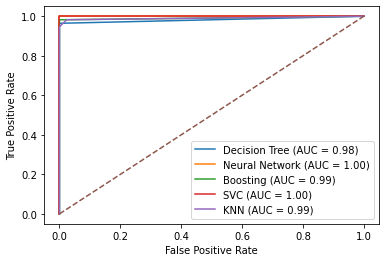

In [942]:
plot_compare_roc_curve(list_roc_2, 'roc_compare_2.png')